In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

In [55]:
thresh = 0.1 
test_df = pd.read_csv(f'../Data/test_df{thresh}.csv')
train_df = pd.read_csv(f'../Data/train_df{thresh}.csv')

In [56]:
test_df.columns

Index(['PhysicalHealthDays', 'SleepHours', 'HeightInMeters', 'GeneralHealth',
       'RemovedTeeth', 'AgeCategory', 'SmokerStatus_ord', 'AlcoholDrinkers',
       'BlindOrVisionDifficulty', 'ChestScan', 'CovidPosNo', 'CovidPosYes',
       'DifficultyConcentrating', 'DifficultyDressingBathing',
       'DifficultyErrands', 'DifficultyWalking', 'FluVaxLast12', 'HIVTesting',
       'HadAngina', 'HadArthritis', 'HadDiabetesOther', 'HadDiabetesYes',
       'HadKidneyDisease', 'HadSkinCancer', 'HadStroke', 'LastCheckupTime',
       'PhysicalActivities', 'PneumoVaxEver', 'RaceEthnicityCategoryHispanic',
       'RaceEthnicityCategoryMultiracial,_Non-Hispanic',
       'RaceEthnicityCategoryOther_race_only,_Non-Hispanic',
       'RaceEthnicityCategoryWhite_only,_Non-Hispanic',
       'RegionEast_South_Central', 'RegionMiddle_Atlantic',
       'RegionMountain_Region', 'RegionNew_England', 'RegionTerritories',
       'Sex', 'TetanusLast10Tdap', 'HadHeartAttack'],
      dtype='object')

## Fit model

In [57]:
# scikit-learn logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(train_df.drop('HadHeartAttack', axis=1), train_df['HadHeartAttack'])

LogisticRegression(max_iter=1000)

## ROC Curve

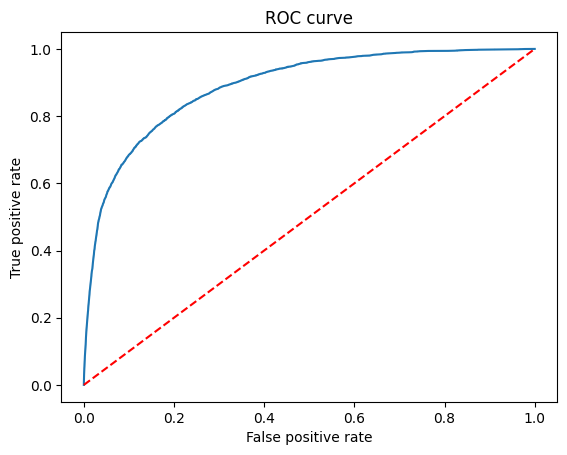

In [58]:
# ROC curve
y_pred_proba = log_model.predict_proba(test_df.drop('HadHeartAttack', axis=1))
fpr, tpr, thresholds = roc_curve(test_df['HadHeartAttack'], y_pred_proba[:,1])
sns.lineplot(x=fpr, y=tpr)
sns.lineplot(x=[0,1], y=[0,1], color='red', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


## Test Metrics

In [59]:
# Make predictions with a 0.8 threshold
y_pred = log_model.predict_proba(test_df.drop('HadHeartAttack', axis=1))[:, 1] > 0.58
print(classification_report(test_df['HadHeartAttack'], y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     69825
           1       0.60      0.18      0.28      3982

    accuracy                           0.95     73807
   macro avg       0.78      0.59      0.63     73807
weighted avg       0.94      0.95      0.94     73807



                 Predicted negative  Predicted positive
Actual negative               69343                 482
Actual positive                3263                 719


<Axes: >

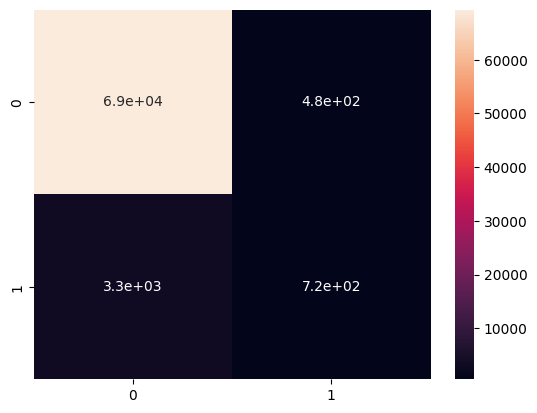

In [60]:
# Confusion matrix
cm = confusion_matrix(test_df['HadHeartAttack'], y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted negative', 'Predicted positive'], index=['Actual negative', 'Actual positive'])
print(cm_df)
sns.heatmap(cm, annot=True)

## Feature Importance

In [61]:
# Return the feature importances and p values for the significant variables
feature_importances = pd.DataFrame(log_model.coef_[0], index=train_df.drop('HadHeartAttack', axis=1).columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances

,Importance
HadAngina,2.417897
HadStroke,0.849937
Sex,0.706925
ChestScan,0.566144
"RaceEthnicityCategoryMultiracial,_Non-Hispanic",0.407213
CovidPosYes,0.388184
CovidPosNo,0.364412
HadDiabetesYes,0.324255
"RaceEthnicityCategoryOther_race_only,_Non-Hispanic",0.317643
RaceEthnicityCategoryHispanic,0.230569


I don't fully understand how both having and not having COVID are among the most important. The third option is "Home Test" so maybe people who go test for COVID are also more likely to be people who generally have higher health risks.